In [117]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import sys,os

In [118]:
sourcedata=f'../SourceData/DataScienceSalary2021to2023.csv'

In [119]:
#sourcedata = './SourceData/DataScienceSalary2021to2023.csv'
df = pd.read_csv(sourcedata)
df.head(5)
#print(df.head(10))
#df=df.select('work_year','job_title')

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [120]:
df.describe()

,work_year,salary,salary_in_usd
count,3761.000000,3.761000e+03,3761.000000
mean,2022.374103,1.905999e+05,137555.178942
std,0.691252,6.711457e+05,63022.267974
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.375000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


In [122]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'company_location',
       'company_size'],
      dtype='object')

In [123]:
df.dtypes

work_year            int64
experience_level    object
employment_type     object
job_title           object
salary               int64
salary_currency     object
salary_in_usd        int64
company_location    object
company_size        object
dtype: object

In [124]:
df[df.duplicated()].sort_values(by=['job_title','salary_in_usd']).count()

work_year           1351
experience_level    1351
employment_type     1351
job_title           1351
salary              1351
salary_currency     1351
salary_in_usd       1351
company_location    1351
company_size        1351
dtype: int64

In [125]:
df=df.drop_duplicates()

In [126]:
df.duplicated(['work_year','experience_level','employment_type','job_title','salary_in_usd',
             'company_location','company_size']).count()

2410

In [127]:
print(df[df[['work_year','experience_level','employment_type','job_title','salary_in_usd',
             'company_location','company_size']].duplicated()])

      work_year experience_level employment_type                  job_title  \
234        2023               MI              FT               Data Analyst   
235        2023               MI              FT               Data Analyst   
3142       2022               SE              FT  Machine Learning Engineer   
3143       2022               SE              FT  Machine Learning Engineer   

      salary salary_currency  salary_in_usd company_location company_size  
234   121500             USD         121500               US            M  
235    60000             GBP          72914               GB            M  
3142  186000             USD         186000               US            M  
3143  148800             USD         148800               US            M  


In [128]:
df.reset_index(drop=True)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


In [129]:
df=df.drop(columns=['salary','salary_currency'])

In [130]:
df=df[['work_year','experience_level','employment_type','job_title','company_location','company_size','salary_in_usd']]

In [131]:
df.shape

(2410, 7)

In [132]:
#Count the number of null values
df.isnull().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
company_location    0
company_size        0
salary_in_usd       0
dtype: int64

In [133]:
#rename the Columns
df = df.rename(columns={
    'work_year':'year',
    'experience_level':'experience',
    'employment_type':'employment',
    'job_title':'title',
    'company_location':'location',
    'company_size':'companysize',
    'salary_in_usd':'salary'})

In [134]:
#Convert the column name to upper case
df.columns=df.columns.str.upper()

In [135]:
df

,YEAR,EXPERIENCE,EMPLOYMENT,TITLE,LOCATION,COMPANYSIZE,SALARY
0,2023,EN,FT,Applied Scientist,US,L,213660
1,2023,EN,FT,Applied Scientist,US,L,130760
2,2023,EN,FT,Data Quality Analyst,NG,L,100000
3,2023,EN,FT,Compliance Data Analyst,NG,L,30000
4,2023,EN,FT,Applied Scientist,US,L,204620
...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,DE,M,148261
3757,2020,SE,FT,Data Scientist,AT,S,91237
3758,2020,SE,FT,Data Science Manager,US,M,190200
3759,2020,SE,FT,Machine Learning Engineer,HR,S,45618


In [136]:
unique_experience_levels = df['EXPERIENCE'].unique()
unique_employment_types = df['EMPLOYMENT'].unique()
unique_company_sizes = df['COMPANYSIZE'].unique()

print("Unique Experience Levels:", unique_experience_levels)
print("Unique Employment Types:", unique_employment_types)
print("Unique Company Sizes:", unique_company_sizes)

Unique Experience Levels: ['EN' 'EX' 'MI' 'SE']
Unique Employment Types: ['FT' 'PT' 'CT' 'FL']
Unique Company Sizes: ['L' 'M' 'S']


In [137]:
#Replace Experience Abreviation with actual values
df['EXPERIENCE'] = df['EXPERIENCE'].replace('EN', 'Entry Level')
df['EXPERIENCE'] = df['EXPERIENCE'].replace('EX', 'Experienced')
df['EXPERIENCE'] = df['EXPERIENCE'].replace('MI', 'Mid Level')
df['EXPERIENCE'] = df['EXPERIENCE'].replace('SE', 'Senior')


<Axes: xlabel='EXPERIENCE'>

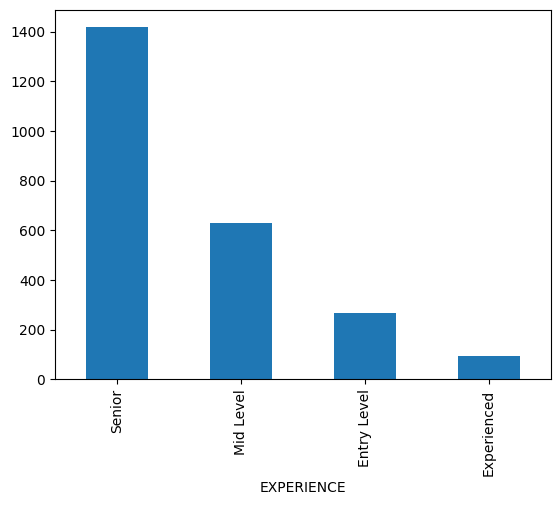

In [138]:
df['EXPERIENCE'].value_counts().plot(kind='bar')

In [139]:
#Replace Employment Abreviation with actual values
df['EMPLOYMENT'] = df['EMPLOYMENT'].replace('FT', 'Full time')
df['EMPLOYMENT'] = df['EMPLOYMENT'].replace('PT', 'Part time')
df['EMPLOYMENT'] = df['EMPLOYMENT'].replace('CT', 'Contractor')
df['EMPLOYMENT'] = df['EMPLOYMENT'].replace('FL', 'Freelancer')


<Axes: xlabel='EMPLOYMENT'>

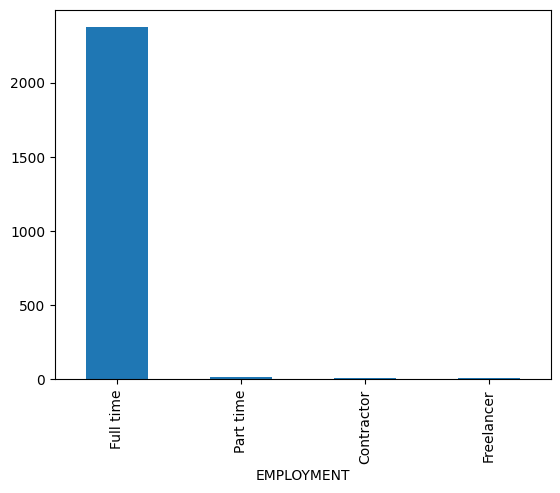

In [140]:
df['EMPLOYMENT'].value_counts().plot(kind='bar')

In [141]:
#Replace Company size Abreviation with actual values
df['COMPANYSIZE'] = df['COMPANYSIZE'].replace('L', 'Large')
df['COMPANYSIZE'] = df['COMPANYSIZE'].replace('M', 'Medium')
df['COMPANYSIZE'] = df['COMPANYSIZE'].replace('S', 'Small')


<Axes: xlabel='COMPANYSIZE'>

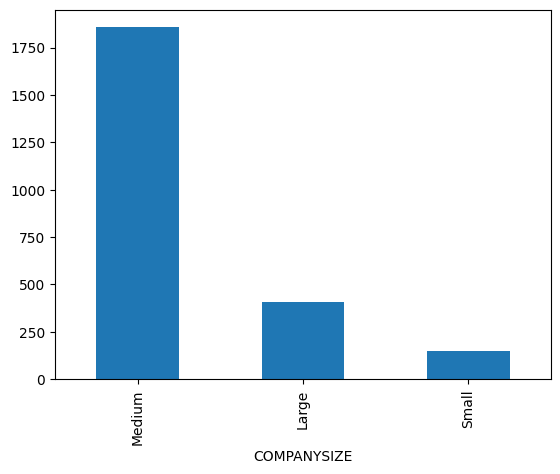

In [142]:
df['COMPANYSIZE'].value_counts().plot(kind='bar')

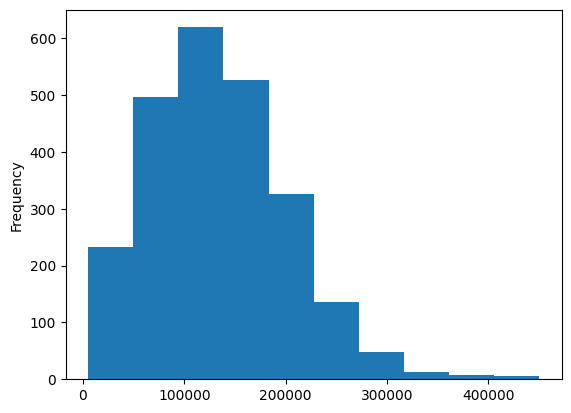

In [143]:
df["SALARY"].plot(kind='hist')
plt.show()

<Axes: xlabel='TITLE'>

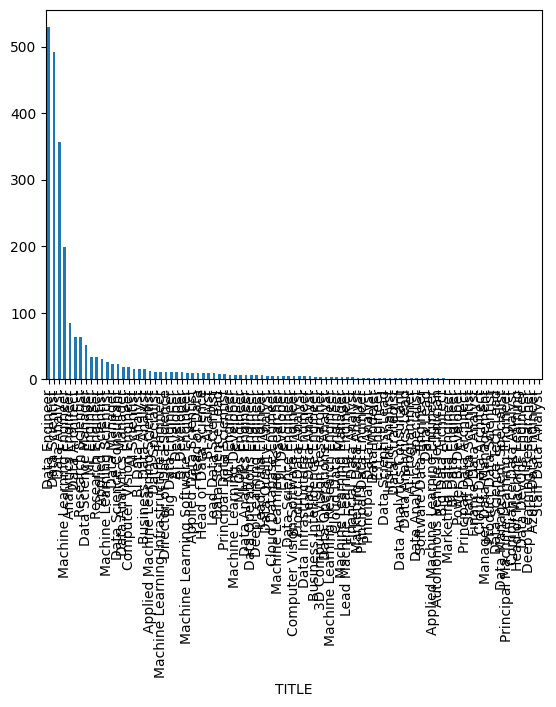

In [144]:
#Visualize the Total records across the job title
df['TITLE'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

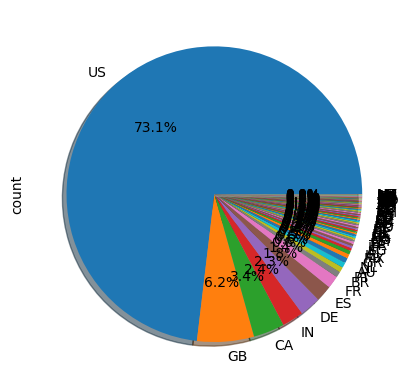

In [145]:
df['LOCATION'].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True,startangle=0)

In [146]:
#dataframe for Average Salary for Experenced and Employment
df_avgsal = df.groupby(["EXPERIENCE","EMPLOYMENT"])["SALARY"].mean().reset_index().sort_values(by='SALARY',ascending=False)
df_avgsal

,EXPERIENCE,EMPLOYMENT,SALARY
4,Experienced,Contractor,416000.000000
5,Experienced,Full time,188590.510638
12,Senior,Full time,154738.293909
8,Mid Level,Full time,101988.559871
10,Senior,Contractor,97500.000000
6,Mid Level,Contractor,78600.000000
1,Entry Level,Freelancer,75000.000000
2,Entry Level,Full time,74479.060241
0,Entry Level,Contractor,65234.500000
11,Senior,Freelancer,53333.333333


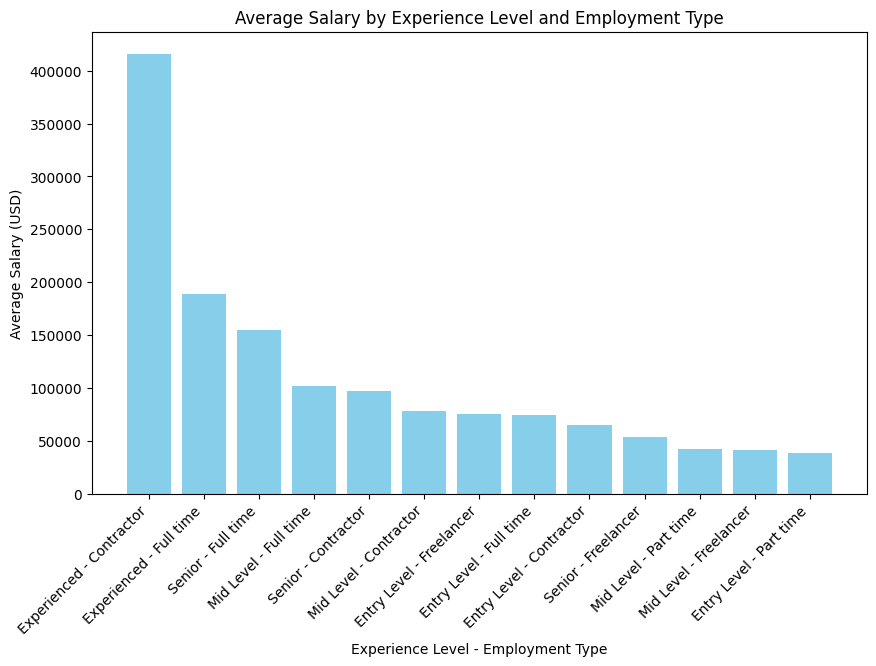

In [147]:
#Visualize Experience & Employment type w.r.t Avg Salary
plt.figure(figsize=(10,6))
plt.bar(range(len(df_avgsal)), df_avgsal['SALARY'], color='skyblue')
plt.xticks(range(len(df_avgsal)), df_avgsal['EXPERIENCE'] + " - " + df_avgsal['EMPLOYMENT'], rotation=45, ha="right")
plt.title('Average Salary by Experience Level and Employment Type')
plt.xlabel('Experience Level - Employment Type')
plt.ylabel('Average Salary (USD)')
plt.show()

In [148]:
df.groupby(["COMPANYSIZE"])["SALARY"].mean().reset_index().sort_values(by='SALARY',ascending=False)

,COMPANYSIZE,SALARY
1,Medium,141582.364028
0,Large,112509.399015
2,Small,78364.278912


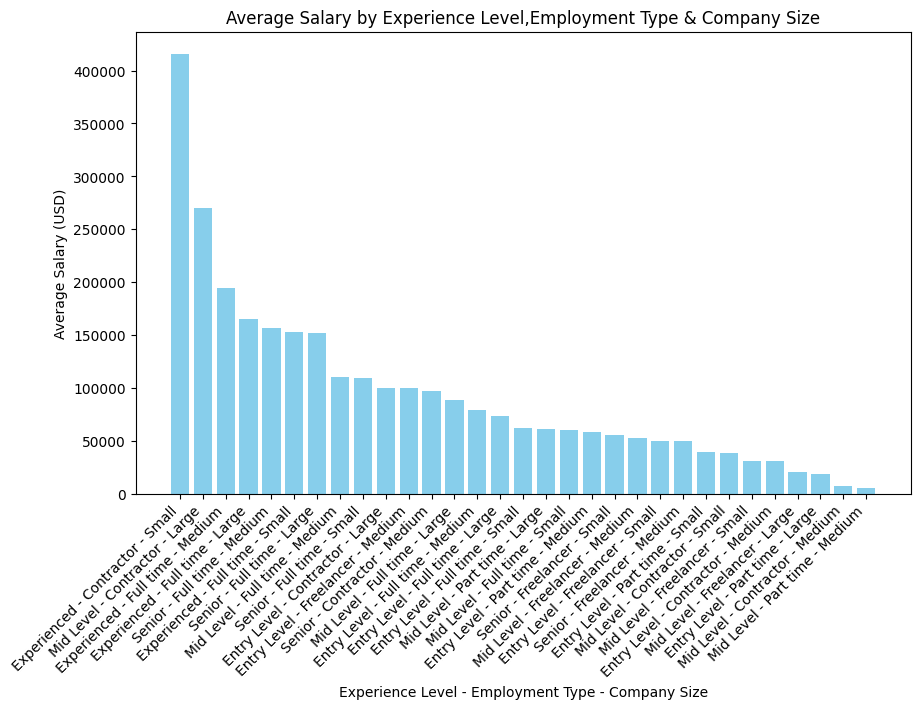

In [149]:
df_expempsize_sal=df.groupby(["EXPERIENCE","EMPLOYMENT","COMPANYSIZE"])["SALARY"].mean().reset_index().sort_values(by='SALARY',ascending=False)
df_expempsize_sal

#Visualize Experience & Employment type w.r.t Avg Salary
plt.figure(figsize=(10,6))
plt.bar(range(len(df_expempsize_sal)), df_expempsize_sal['SALARY'], color='skyblue')
plt.xticks(range(len(df_expempsize_sal)), df_expempsize_sal['EXPERIENCE'] + " - " + df_expempsize_sal['EMPLOYMENT']+ " - " + df_expempsize_sal['COMPANYSIZE'], rotation=45, ha="right")
plt.title('Average Salary by Experience Level,Employment Type & Company Size')
plt.xlabel('Experience Level - Employment Type - Company Size')
plt.ylabel('Average Salary (USD)')
plt.show()

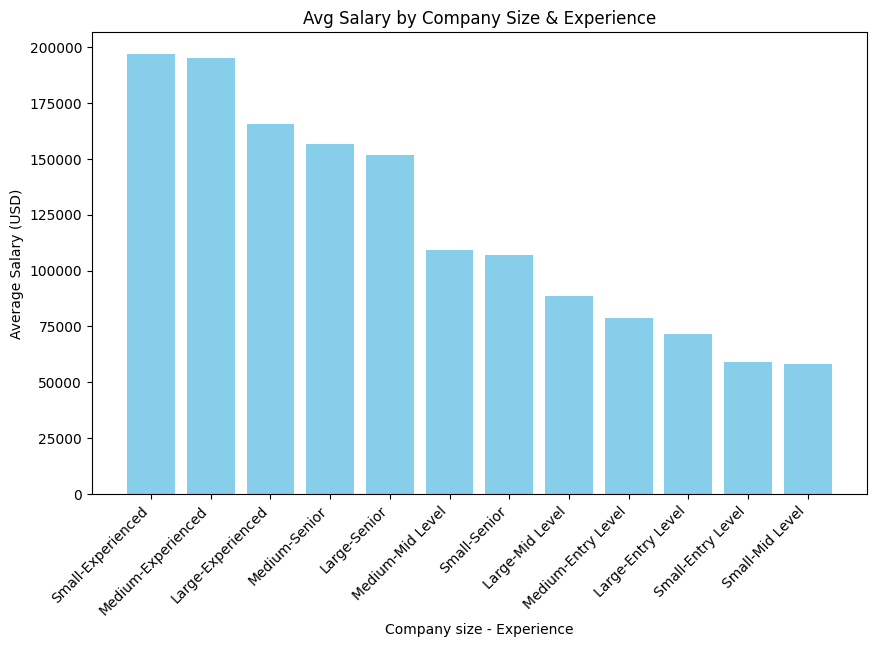

In [150]:
df_comanysize_avgsalary = df.groupby(['COMPANYSIZE','EXPERIENCE'])['SALARY'].mean().reset_index().sort_values('SALARY',ascending=False)
df_comanysize_avgsalary

plt.figure(figsize=(10,6))
#plt.bar(range(len(df_comanysize_avgsalary)),df_comanysize_avgsalary['SALARY'],color='skyblue')
#plt.bar(df_comanysize_avgsalary.index,df_comanysize_avgsalary['SALARY'],color='skyblue')
plt.bar(range(len(df_comanysize_avgsalary)),df_comanysize_avgsalary['SALARY'],color='skyblue')
plt.xticks(range(len(df_comanysize_avgsalary)),df_comanysize_avgsalary['COMPANYSIZE']+"-"+df_comanysize_avgsalary['EXPERIENCE'],rotation=45,ha='right')
plt.xlabel('Company size - Experience')
plt.ylabel('Average Salary (USD)')
plt.title('Avg Salary by Company Size & Experience')
plt.show()

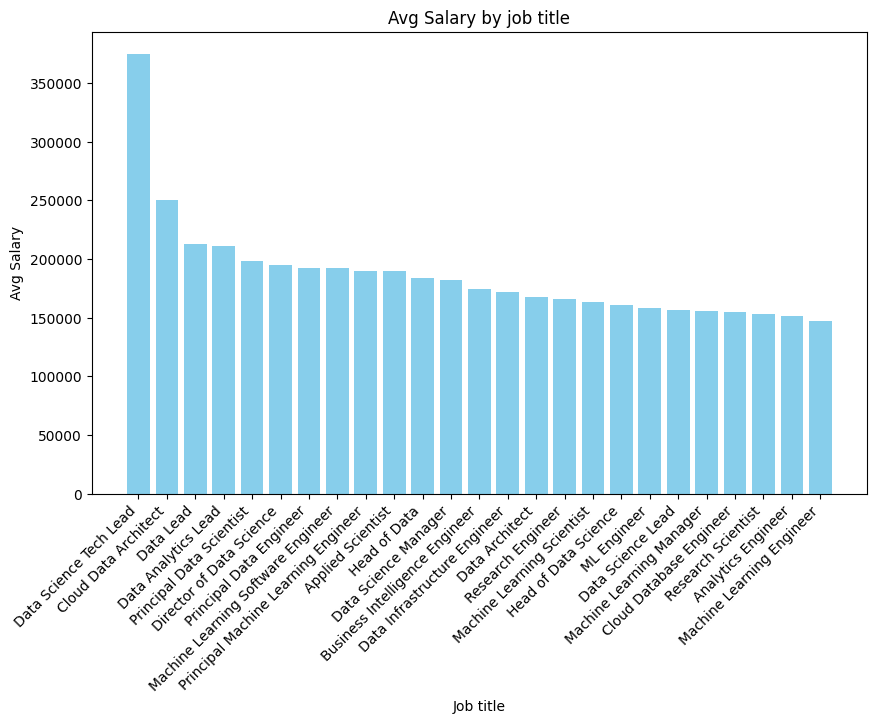

In [151]:
#Average Salary by Job title
df_title_avgsal=df.groupby(['TITLE'])['SALARY'].mean().reset_index().sort_values('SALARY',ascending=False).head(25)
df_title_avgsal

plt.figure(figsize=(10,6))
plt.bar(range(len(df_title_avgsal)),df_title_avgsal['SALARY'],color='skyblue')
plt.xticks(range(len(df_title_avgsal)),df_title_avgsal['TITLE'],rotation=45,ha='right')
plt.title('Avg Salary by job title')
plt.xlabel('Job title')
plt.ylabel('Avg Salary')
plt.show()

In [152]:
#Saving Scrubbed/Clean Data to csv file
#df.to_csv('../SourceData/DataScienceSalary_Scrubbed.csv')

In [153]:
df

,YEAR,EXPERIENCE,EMPLOYMENT,TITLE,LOCATION,COMPANYSIZE,SALARY
0,2023,Entry Level,Full time,Applied Scientist,US,Large,213660
1,2023,Entry Level,Full time,Applied Scientist,US,Large,130760
2,2023,Entry Level,Full time,Data Quality Analyst,NG,Large,100000
3,2023,Entry Level,Full time,Compliance Data Analyst,NG,Large,30000
4,2023,Entry Level,Full time,Applied Scientist,US,Large,204620
...,...,...,...,...,...,...,...
3756,2020,Senior,Full time,Principal Data Scientist,DE,Medium,148261
3757,2020,Senior,Full time,Data Scientist,AT,Small,91237
3758,2020,Senior,Full time,Data Science Manager,US,Medium,190200
3759,2020,Senior,Full time,Machine Learning Engineer,HR,Small,45618


In [154]:
range(len(df_exp_sal))

range(0, 95)

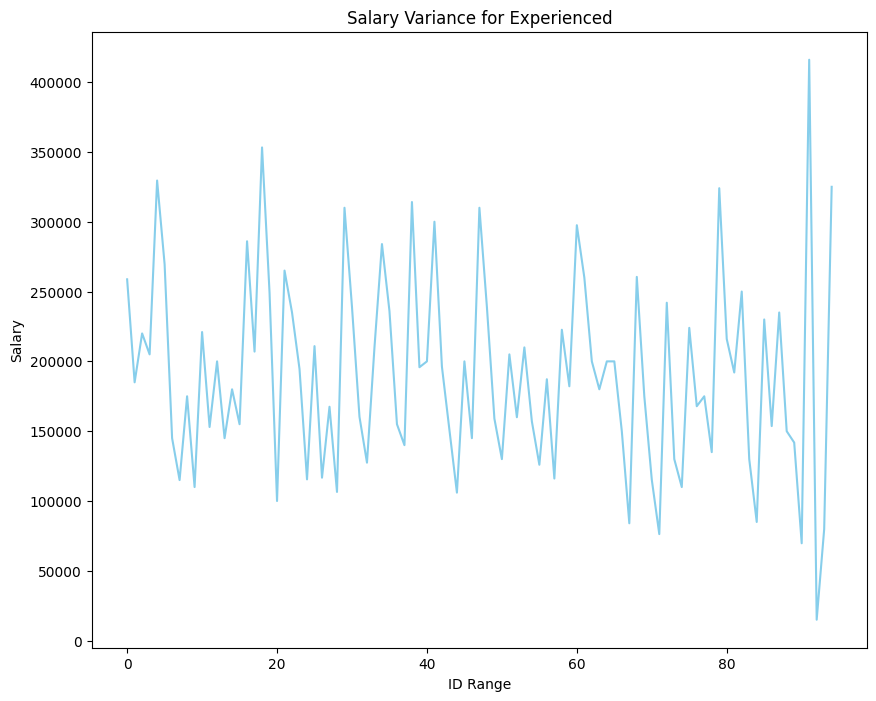

In [155]:
df_exp_sal= df[['EXPERIENCE','SALARY']][df['EXPERIENCE'] =='Experienced']
df_exp_sal['EXPERIENCE'].unique()
plt.figure(figsize=(10,8))
#plt.scatter(df_exp_sal.index.values,df_exp_sal['SALARY'])
plt.plot(range(len(df_exp_sal)),df_exp_sal['SALARY'],color='skyblue')
#plt.xticks(range(len(df_title_avgsal)),df_title_avgsal['TITLE'],rotation=45,ha='right')
#plt.bar(range(len(df_exp_sal)),df_exp_sal['SALARY'],color='skyblue')
#plt.xticks(range(len(df_exp_sal)),df_exp_sal.index.values,rotation=45,ha='right')
plt.title('Salary Variance for Experienced')
plt.xlabel('ID Range')
plt.ylabel('Salary')
plt.show()